In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df = pd.get_dummies(data=titanic_df, columns=['Embarked', 'Sex'])

In [9]:
ages = titanic_df['Age']

In [10]:
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
le_18 = ages.loc[ages <= 18]
le_25 = ages.loc[(ages > 18) & (ages <= 25)]
le_35 = ages.loc[(ages > 25) & (ages <= 35)]
le_50 = ages.loc[(ages > 35) & (ages <= 50)]
le_65 = ages.loc[(ages > 50) & (ages <= 65)]
g_65 = ages.loc[ages > 65]

In [12]:
g_65

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [13]:
mappings_18 = {idx: 1 for idx in list(le_18.index)}
mappings_25 = {idx: 2 for idx in list(le_25.index)}
mappings_35 = {idx: 3 for idx in list(le_35.index)}
mappings_50 = {idx: 4 for idx in list(le_50.index)}
mappings_65 = {idx: 5 for idx in list(le_65.index)}
mappings_g65 = {idx: 6 for idx in list(g_65.index)}


In [14]:
total_age_map = mappings_18 | mappings_25 | mappings_35 | mappings_50 | mappings_65 | mappings_g65

TypeError: unsupported operand type(s) for |: 'dict' and 'dict'

In [15]:
total_age_map

NameError: name 'total_age_map' is not defined

In [16]:
ages_updated = titanic_df.index.map(total_age_map)

NameError: name 'total_age_map' is not defined

In [17]:
titanic_df['Age'] = ages_updated

NameError: name 'ages_updated' is not defined

In [18]:
titanic_df.head(25)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,0,0,1,0


In [20]:
fares = titanic_df['Fare']

In [21]:
fares.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [22]:
f_10 = fares.loc[fares <= 10]
f_25 = fares.loc[(fares > 10) & (fares <= 25)]
f_35 = fares.loc[(fares > 25) & (fares <= 35)]
f_50 = fares.loc[(fares > 35) & (fares <= 50)]
f_65 = fares.loc[(fares > 50) & (fares <= 65)]
fe_65 = fares.loc[fares > 65]

In [23]:
mapping_f10 = {idx: 1 for idx in list(f_10.index)}
mapping_f25 = {idx: 2 for idx in list(f_25.index)}
mapping_f35 = {idx: 3 for idx in list(f_35.index)}
mapping_f50 = {idx: 4 for idx in list(f_50.index)}
mapping_f65 = {idx: 5 for idx in list(f_65.index)}
mapping_fe65 = {idx: 6 for idx in list(fe_65.index)}


In [27]:
fares_updated = {** mapping_f10, ** mapping_f25, ** mapping_f35, ** mapping_f50, ** mapping_f65, ** mapping_fe65}

In [28]:
titanic_df['Fare'] = fares_updated

In [29]:
titanic_df.head(25)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,2,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,4,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,5,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,12,NaN,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,14,NaN,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,19,E46,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,22,NaN,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,26,NaN,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,28,NaN,1,0,0,1,0


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

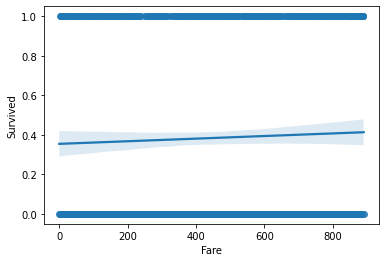

In [46]:
sns.regplot(x=titanic_df["Fare"], y=titanic_df["Survived"])